# Loading important packages and classes

In [1]:
get_ipython().magic('matplotlib notebook')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt

In this project, By examining factors such as class, sex, and age, we will experiment with classification algorithms and build a program that can predict whether a given passenger would have survived this disaster.

# Loading the traing data file

In [2]:
train_dataset = pd.read_csv('train.csv')


# Descriptive statistics of dataset

 This is section descriptive analytics have been done using simple statistical functions.

In [3]:
train_dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dean, Mr. Bertram Frank",male,347082,B96 B98,S
freq,1,577,7,4,644


By above results, it can be easily concluded that that that total 891 distinct values for the name, 891 distinct values for the name, 2 distinct values for the sex, 681 distinct values for the Ticket, 147 distinct values for the Cabin, 3 distinct values for the Embarked 

In [5]:

train_dataset['Survived'].mean()
    


0.3838383838383838

By exammine the total dataset, there is total 38.38% chances of survival, Hence,  38.38% passengers from total number of passengers who were onboarded titanic were survived. 

In [6]:
train_dataset.groupby('Pclass').mean()
    

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Above table is classwise survival distribution. It can be clearly concluded that 1st class passengers have higher chances of survival than other two classes.

In [7]:
Pclass_sex_grouping=train_dataset.groupby(['Pclass','Sex']).mean()
Pclass_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

<IPython.core.display.Javascript object>


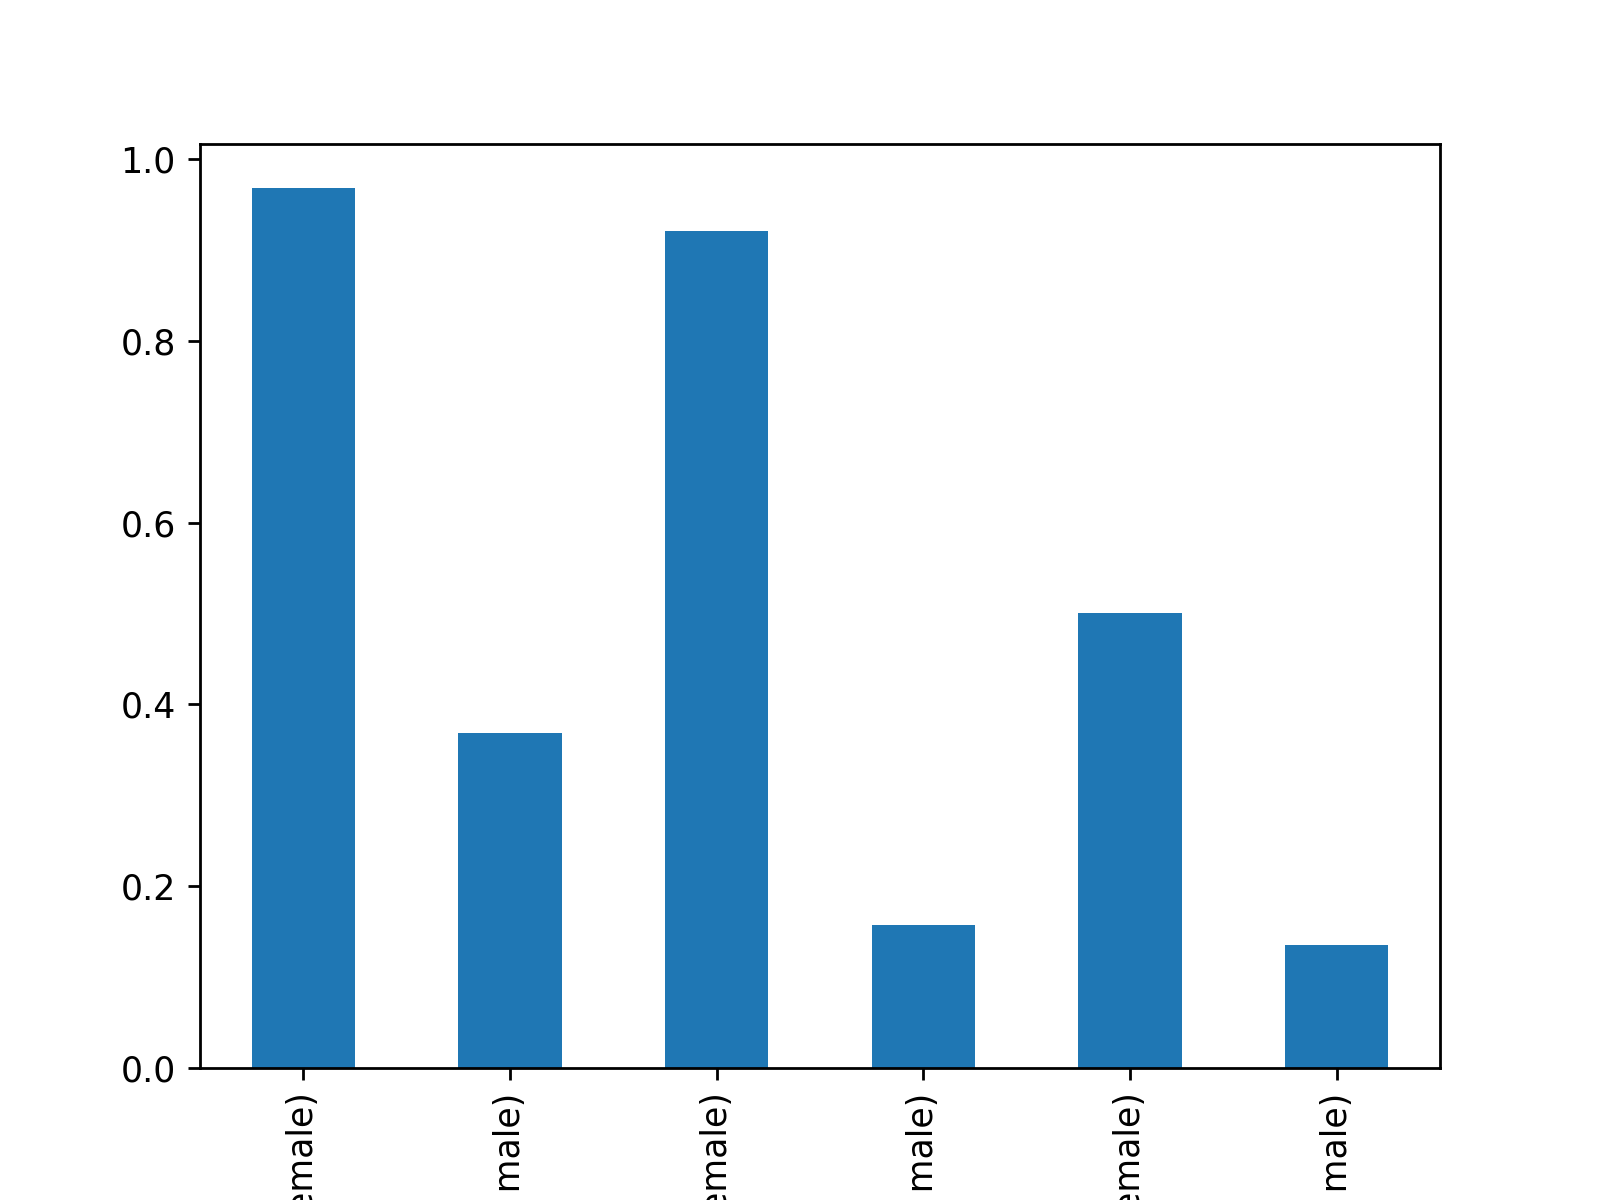

In [8]:
Pclass_sex_grouping['Survived'].plot.bar()

Above table/graph is classwise and genderwise survival distribution. It can be clearly concluded that women of all classes have higher higher chances of survival than men of respective classes. Overall 1st class women have highest chances of survival.

In [9]:
group_by_age = pd.cut(train_dataset["Age"], np.arange(0, 90, 10))

In [10]:
age_grouping = train_dataset.groupby(group_by_age).mean()
    

<IPython.core.display.Javascript object>


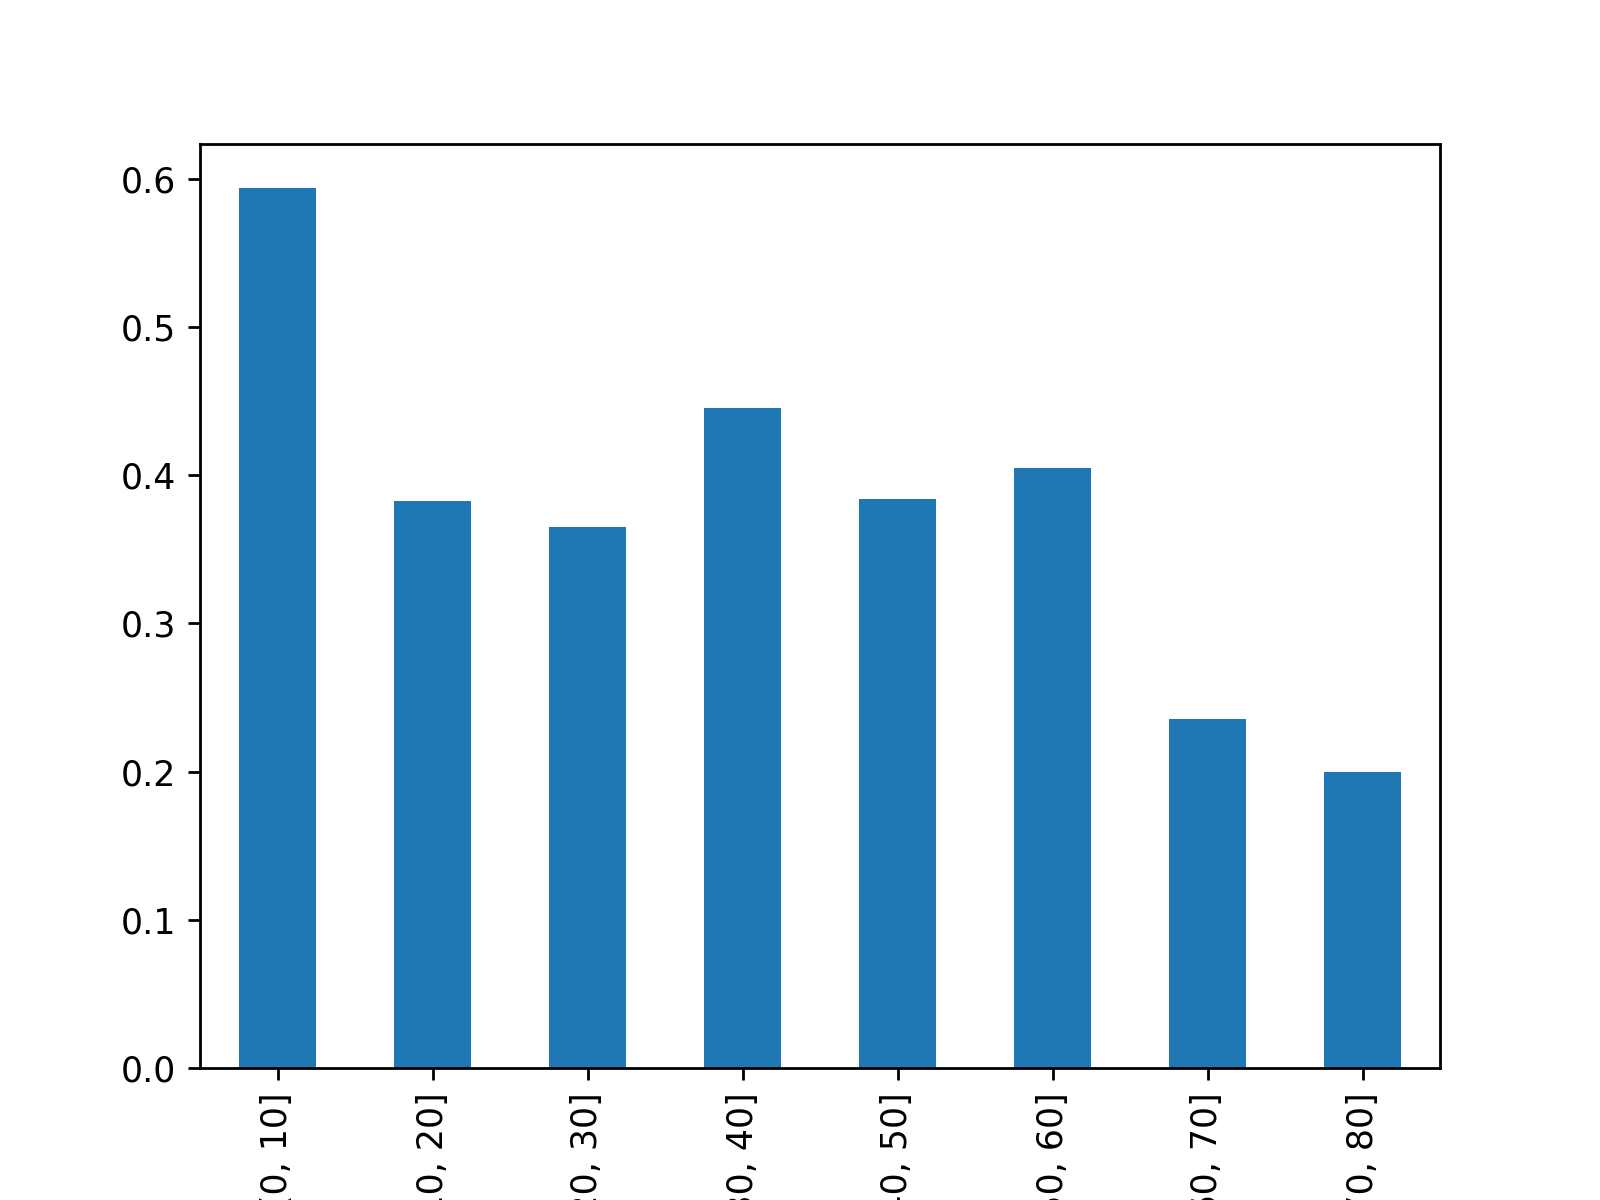

In [14]:
age_grouping['Survived'].plot.bar()

Above table/graph is age groupwise survival distribution. All passenger are divided into 8 group dependeing upon their age.
It can be clearly concluded that childern having age below 10 years have higher highest chances of survival.

# Selection of classification algorithm 

In this project, the prediction of the survival of passengers has to done based upon the different charateristics of passengers. 

For this prediction, one training data set is given with the results like whether the passenger is survived or not. we are given the training dataset with the end result or output and hence this is case of supervised Machine Learning problem where we know the end result. This training set needs to be split into training and Validation(AKA testing) datasets. The Supervised Machine Learning model needs to traind and validated using this dataset.

We are also given the testing dataset without the survival columns. for this list of passengers we have to predict the survival. The already created algorirthm have to be appiled on this dataset and the result(survival fuction) needs to be predicted. 

We have to predict the survival( survived or not survived: two classes) which is catagorical output. 

So, for such cases, The Supervised Machine Learning Classification Algorithm is required. So, k nearest neighbor classification algorithm has been applied here.

# Preparing the data for the classification algorithm

In [11]:
train_dataset.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

From above table, Cabin column have value for only 204 rows which is very low. Hence, Cabin parameter do not have any significant on classification

In [12]:
train_dataset = train_dataset.drop(['Cabin'], axis=1)



Similarily, 'Ticket' and 'Name' parameters also don't have any significance of survival chances hence droping there columns.

In [13]:
train_dataset = train_dataset.drop(['Name','Ticket'], axis=1)

The 'Age' have several 'NA' or 'NaN' into dataset hence imputing the mean value of Age to NaN values

In [19]:
train_dataset=train_dataset.fillna(train_dataset.mean())
train_dataset=train_dataset.dropna()
train_dataset.count()

PassengerId    889
Survived       889
Pclass         889
Sex            889
Age            889
SibSp          889
Parch          889
Fare           889
Embarked       889
dtype: int64

Hence, After data cleaning, the dataset is left with only 889 columns.

# Factorizing the column values

Some of the values have catagorical data like Sex column have catagory like 'Male' or 'Female'. Embarked have catagories like 'C','S' ,etc. hence converting them into factores (e.g. numeric classes like 0,1,2)

In [20]:
train_dataset_copy=train_dataset.copy()
le = preprocessing.LabelEncoder()
train_dataset_copy.Sex = le.fit_transform(train_dataset_copy.Sex)
train_dataset_copy.Embarked = le.fit_transform(train_dataset_copy.Embarked)


In [21]:
train_dataset_copy.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# Selection of input parameters

All input attributes are not significant.To findout which paramenters have most effect on the survival rate, different combination of input variables have been applied to k nearest neighbor classification algorithm( split rate=0.2, n_neighbors=5 selected at random at this point of time)  follows 

In [22]:
X1 = train_dataset_copy[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = train_dataset_copy['Survived']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6179775280898876

In [24]:
X2 = train_dataset_copy[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
y = train_dataset_copy['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6629213483146067

In [26]:
X4 = train_dataset_copy[['PassengerId','Pclass','Sex','Age','Fare']]
y = train_dataset_copy['Survived']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X4,y,test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.651685393258427

In [28]:
X5 = train_dataset_copy[['Pclass','Sex','Age','Fare']]
y = train_dataset_copy['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X5,y,test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7134831460674157

In [30]:
X3 = train_dataset_copy[['PassengerId','Pclass','Sex','Age','SibSp','Parch']]
y = train_dataset_copy['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X3,y,test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5730337078651685

From above results, 'Pclass','Sex','Age' and 'Fare' columns combination have most accurate result.hence, going ahead with selected columns as input variables of model. 

Preparing the data for input variables and output(result) varibale

In [32]:
X = train_dataset_copy[['Pclass','Sex','Age','Fare']]
y = train_dataset_copy['Survived']

Gunplot for more analysis between input variables

<IPython.core.display.Javascript object>


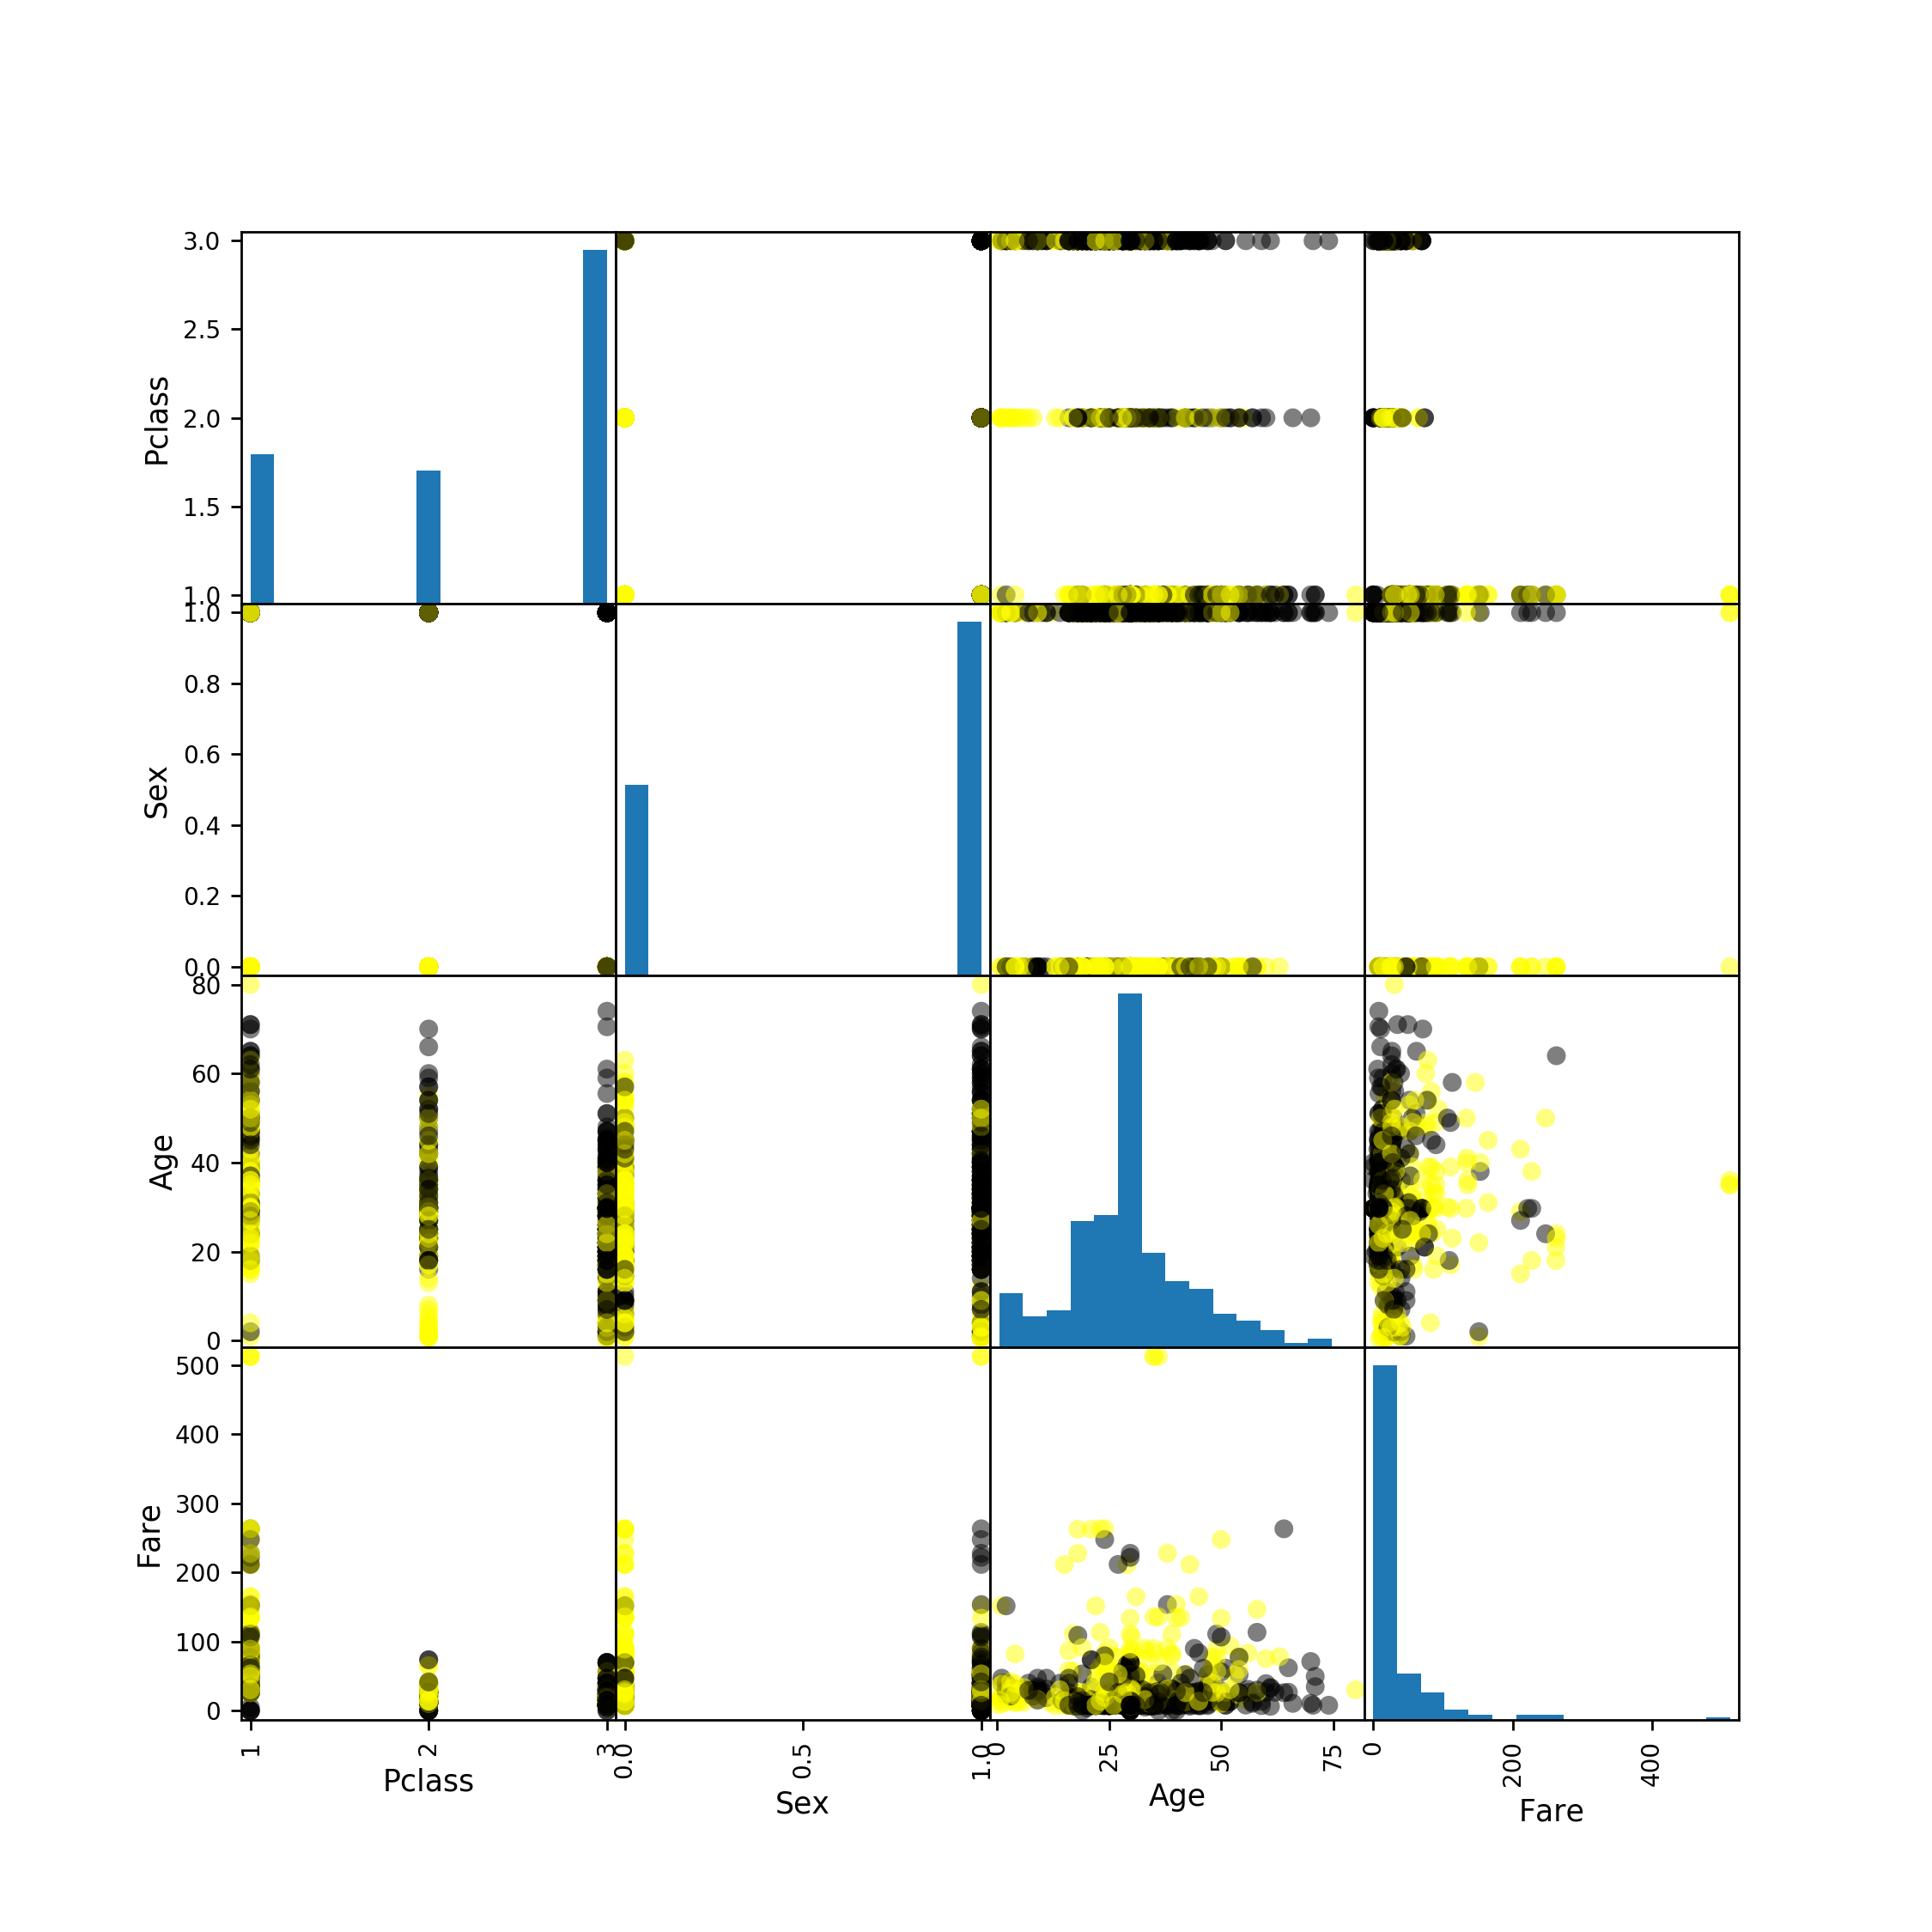

In [33]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

Relationship between Age,Pclass and Sex variables 

<IPython.core.display.Javascript object>


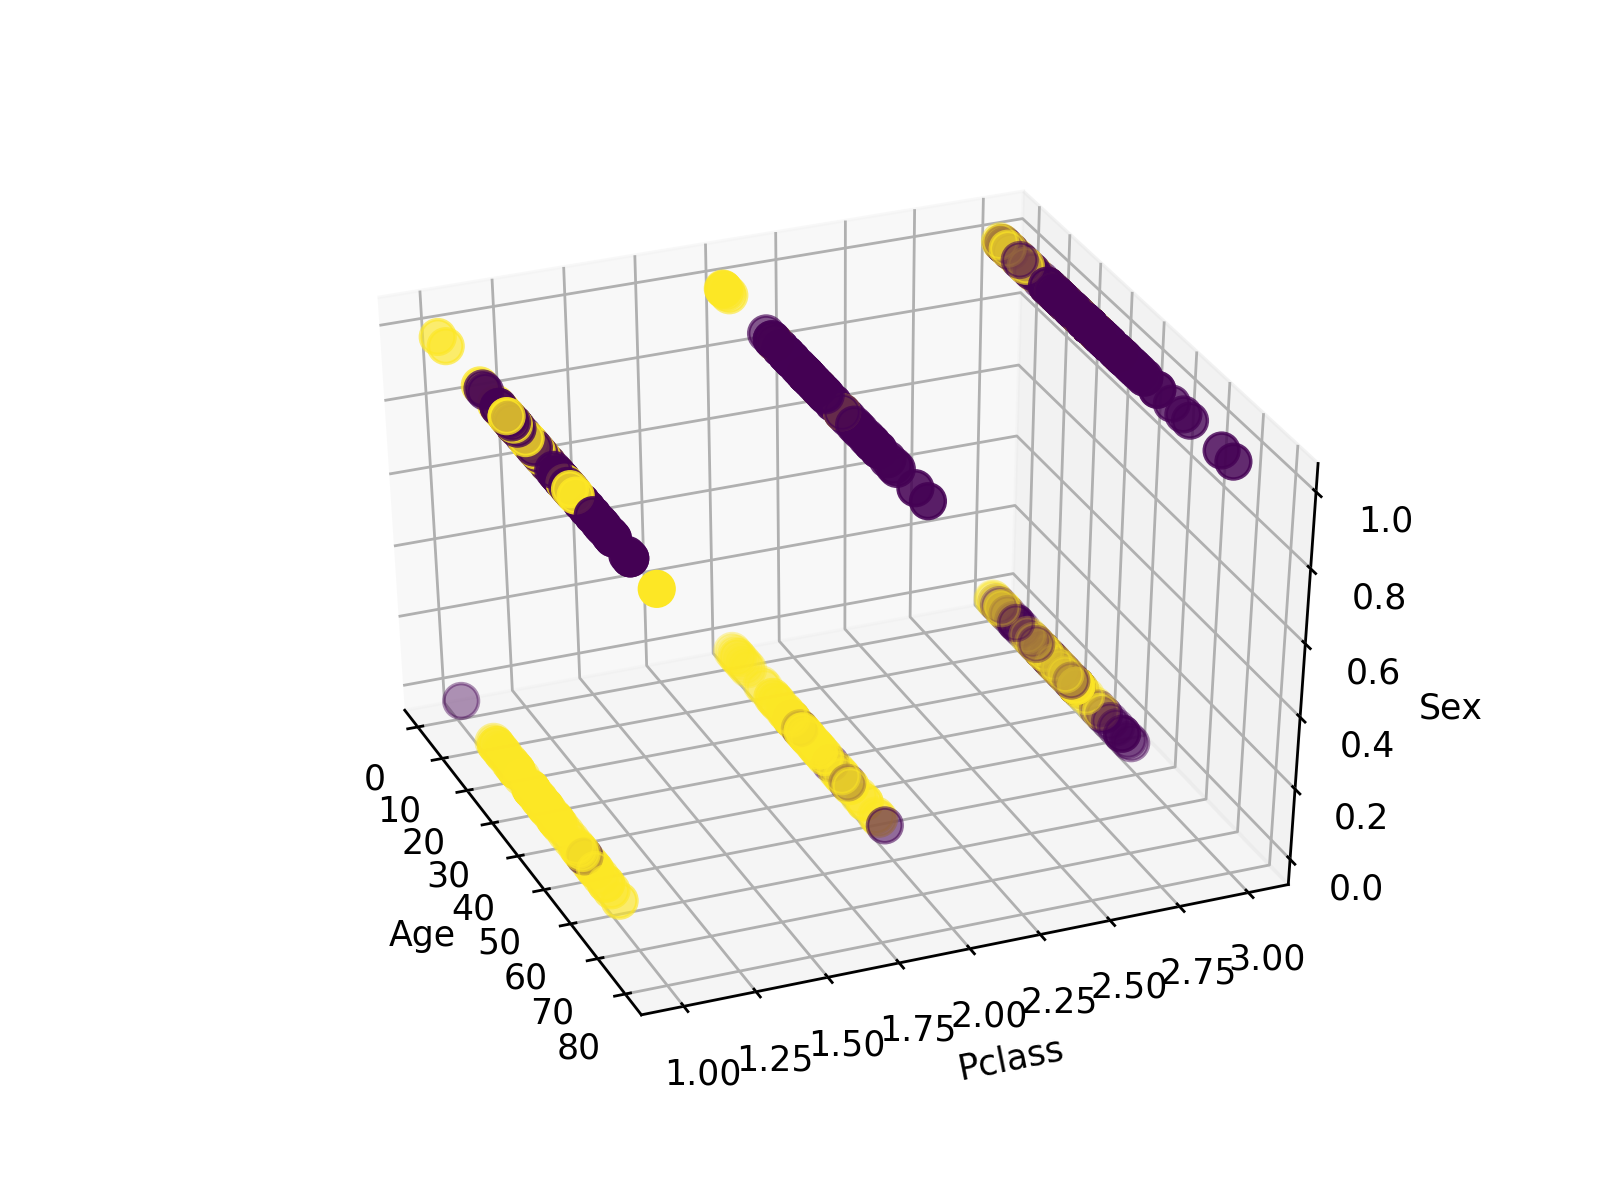

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Age'], X_train['Pclass'], X_train['Sex'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Pclass')
ax.set_zlabel('Sex')
plt.show()

# Selection of K- Number of nearest neighbors

<IPython.core.display.Javascript object>


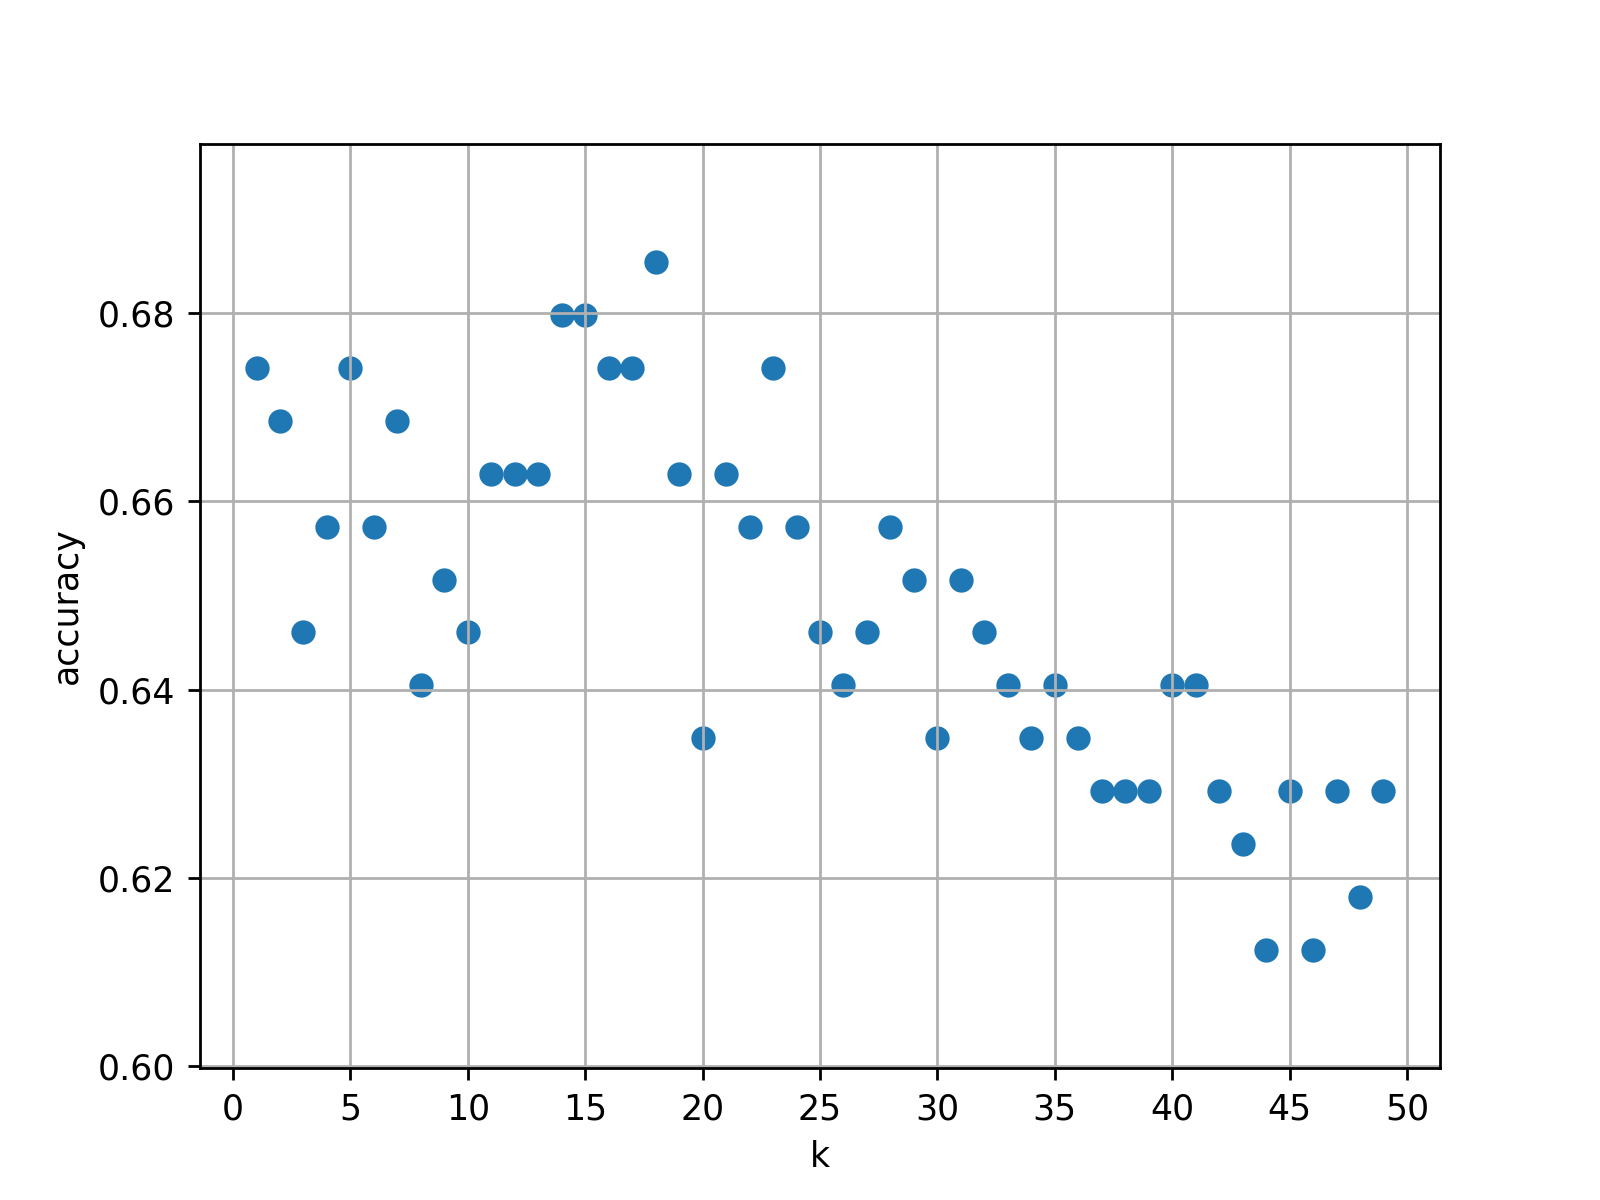

In [35]:
k_range = range(1,50)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.grid()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50]);


In [36]:
scores

[0.6741573033707865,
 0.6685393258426966,
 0.6460674157303371,
 0.65730337078651691,
 0.6741573033707865,
 0.65730337078651691,
 0.6685393258426966,
 0.6404494382022472,
 0.651685393258427,
 0.6460674157303371,
 0.6629213483146067,
 0.6629213483146067,
 0.6629213483146067,
 0.6797752808988764,
 0.6797752808988764,
 0.6741573033707865,
 0.6741573033707865,
 0.6853932584269663,
 0.6629213483146067,
 0.6348314606741573,
 0.6629213483146067,
 0.65730337078651691,
 0.6741573033707865,
 0.65730337078651691,
 0.6460674157303371,
 0.6404494382022472,
 0.6460674157303371,
 0.65730337078651691,
 0.651685393258427,
 0.6348314606741573,
 0.651685393258427,
 0.6460674157303371,
 0.6404494382022472,
 0.6348314606741573,
 0.6404494382022472,
 0.6348314606741573,
 0.6292134831460674,
 0.6292134831460674,
 0.6292134831460674,
 0.6404494382022472,
 0.6404494382022472,
 0.6292134831460674,
 0.6235955056179775,
 0.61235955056179781,
 0.6292134831460674,
 0.61235955056179781,
 0.6292134831460674,
 0.617977

From above graph and table, it is clearly infered that k=18(Accuracy=0.6854) have highest accuracy.  hence going with optimized solution with K=18.

   # Selection of Spliting Ratio of train and test dataset

<IPython.core.display.Javascript object>


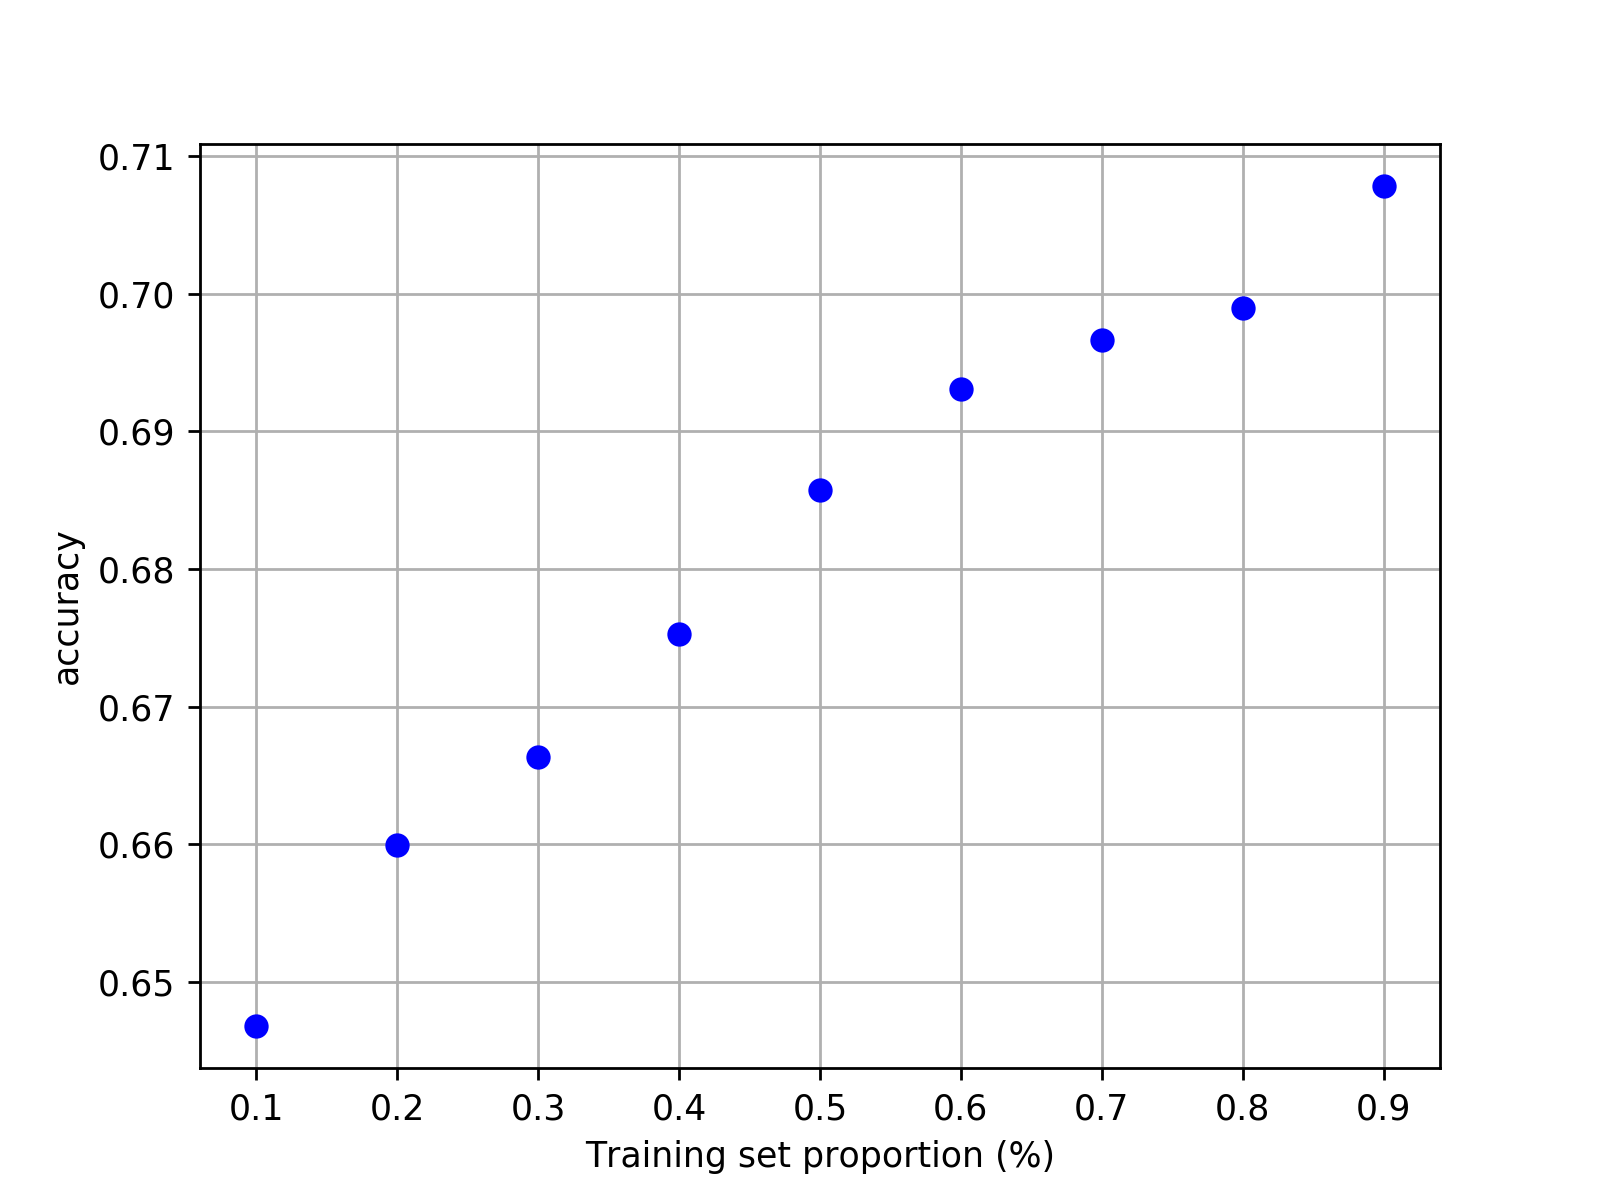

In [39]:
X = train_dataset_copy[['Pclass','Sex','Age','Fare']]
y = train_dataset_copy['Survived']
t = [0.9, 0.8,0.7, 0.6, 0.5,0.4, 0.3,0.2, 0.1]

knn = KNeighborsClassifier(n_neighbors = 18)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1-s,)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.grid()
plt.ylabel('accuracy');

From above graph, test_size=0.1 ( 90% training set,10% testing set ) yield most accurate results.However, this ratio will lead to very less rows for the validation and hence going with test_size=0.2(80% training set,20% testing set )

# Traning the Model with test_size=0.2 and k=18

In [45]:
X = train_dataset_copy[['Pclass','Sex','Age','Fare']]
y = train_dataset_copy['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.702247191011236

# Importing the testing dataset 

In [46]:
test_dataset = pd.read_csv('test.csv')


In [47]:
test_dataset.head()
    

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Preprocessing of Testing data

In [48]:
test_dataset=test_dataset[['PassengerId','Pclass','Sex','Age','Fare']]

In [49]:
test_dataset=test_dataset.fillna(test_dataset.mean())
test_dataset.dropna()
test_dataset_copy=test_dataset.copy()
le = preprocessing.LabelEncoder()
test_dataset_copy.Sex = le.fit_transform(test_dataset_copy.Sex)

test_dataset_copy.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,1,34.5,7.8292
1,893,3,0,47.0,7.0000
2,894,2,1,62.0,9.6875
3,895,3,1,27.0,8.6625
4,896,3,0,22.0,12.2875


In [50]:
test_dataset_copy=test_dataset_copy.dropna()
test_dataset_copy.head()

,PassengerId,Pclass,Sex,Age,Fare
0,892,3,1,34.5,7.8292
1,893,3,0,47.0,7.0000
2,894,2,1,62.0,9.6875
3,895,3,1,27.0,8.6625
4,896,3,0,22.0,12.2875


# Applying the Previously trained model to Predict the survival

In [51]:
Survived=knn.predict(test_dataset_copy[['Pclass','Sex','Age','Fare']])

In [52]:
type(Survived)

numpy.ndarray

In [53]:
test_dataset_copy['Survived']=Survived

In [54]:
test_dataset_copy.head()

,PassengerId,Pclass,Sex,Age,Fare,Survived
0,892,3,1,34.5,7.8292,0
1,893,3,0,47.0,7.0000,0
2,894,2,1,62.0,9.6875,0
3,895,3,1,27.0,8.6625,0
4,896,3,0,22.0,12.2875,0


In [55]:
final_df=test_dataset_copy[['PassengerId','Survived']]

In [56]:
final_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# Exporting the result to csv file

In [57]:
final_df.to_csv('Result.csv',header=True,index=False)

# Effort Table: 

Darshil Gohel ( dxg163330)	65%
Rushabh Shah (rvs160130) 	35%
Total 	100%

